In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [71]:
# for nicer graphs
plt.rcParams["figure.figsize"] = cm2inch(12.8, 9.6)

In [72]:
# Initialize variables
nominal_price = 42
original_spread = 0.01

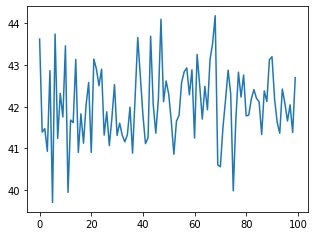

In [73]:
# generate random Gaussian values
from numpy.random import seed
from numpy.random import randn
# seed random number generator
seed(1)
# generate some Gaussian values
# aim here is to represent midpoint from orderbook over time...
values = [(nominal_price + r) for r in randn(100)]
plt.plot(values)

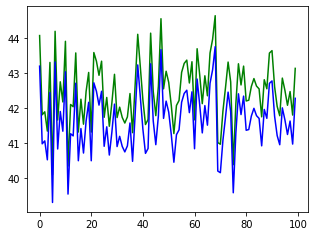

In [74]:
ask_values = [v + v * original_spread for v in values]
bid_values = [v - v * original_spread for v in values]
plt.plot(ask_values, 'g', bid_values, 'b')

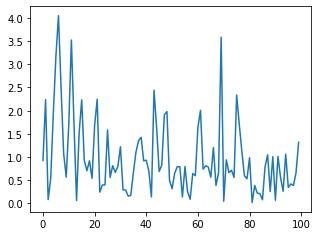

In [75]:
volat = [abs(m - values[i-1]) for i, m in enumerate(values[::1])]
volatl = list(volat)
plt.plot(volatl)

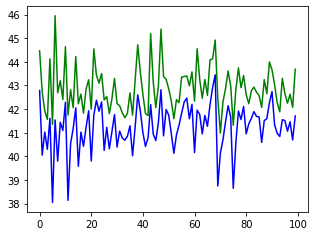

In [76]:
def spread(volat):
    # controling spread from volat
    return volat * original_spread + original_spread 

ask_values = [v + v * spread(o) for v, o in zip(values[::1], volat)]
bid_values = [v - v * spread(o) for v, o in zip(values[::1], volat)]
plt.plot(ask_values, 'g', bid_values, 'b')